In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns 

In [3]:
pd.set_option('display.max_columns', 22)

In [4]:
df = pd.read_csv("nyc-rolling-sales.csv")

In [5]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [6]:
df.drop("Unnamed: 0", inplace=True, axis=1)

In [7]:
df.describe().append(df.isnull().sum().rename("isnull"))

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,ADDRESS,APARTMENT NUMBER,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,EASE-MENT,GROSS SQUARE FEET,LAND SQUARE FEET,NEIGHBORHOOD,SALE DATE,SALE PRICE,TAX CLASS AT PRESENT
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isnull,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]

In [9]:
low_cardinality_cols = [cname for cname in df.columns if df[cname].nunique() < 10 and 
                        df[cname].dtype == "object"]

In [10]:
numerical_cols

['BOROUGH',
 'BLOCK',
 'LOT',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE']

In [11]:
low_cardinality_cols

['EASE-MENT']

In [12]:
df = df.replace(" ", np.NaN)

In [13]:
df.describe().append(df.isnull().sum().rename("isnull"))

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,ADDRESS,APARTMENT NUMBER,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,LAND SQUARE FEET,NEIGHBORHOOD,SALE DATE,SALE PRICE,TAX CLASS AT PRESENT
count,84548.000000,84548.000000,84548.000000,0.0,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.998758,4237.218976,376.224015,NaN,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.289790,3568.263407,658.136814,NaN,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,1322.750000,22.000000,NaN,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.000000,3311.000000,50.000000,NaN,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000000,6281.000000,1001.000000,NaN,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5.000000,16322.000000,9106.000000,NaN,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isnull,0.000000,0.000000,0.000000,84548.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,65496.0,738.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,738.0


In [14]:
df["SALE PRICE"].value_counts()

 -         14561
0          10228
10           766
450000       427
550000       416
           ...  
2970000        1
530150         1
247362         1
402800         1
1128888        1
Name: SALE PRICE, Length: 10008, dtype: int64

In [15]:
df.shape

(84548, 21)

In [16]:
df = df[df["SALE PRICE"] != "0"] 

In [17]:
df = df[df["SALE PRICE"] != ' -  ']

In [18]:
df.shape

(59759, 21)

In [19]:
df["SALE PRICE"].astype("int64")

0         6625000
3         3936272
4         8000000
6         3192840
9        16232000
           ...   
84543      450000
84544      550000
84545      460000
84546    11693337
84547       69300
Name: SALE PRICE, Length: 59759, dtype: int64

In [20]:
df = df.drop(["EASE-MENT"], axis=1)

In [21]:
df["BUILDING CLASS AT PRESENT"] = df["BUILDING CLASS AT PRESENT"].fillna(df["BUILDING CLASS AT PRESENT"].mode()[0])

In [22]:
df["TAX CLASS AT PRESENT"] = df["TAX CLASS AT PRESENT"].fillna(df["TAX CLASS AT PRESENT"].mode()[0])

In [23]:
df.describe().append(df.isnull().sum().rename("isnull"))

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,ADDRESS,APARTMENT NUMBER,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,LAND SQUARE FEET,NEIGHBORHOOD,SALE DATE,SALE PRICE,TAX CLASS AT PRESENT
count,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.939875,4151.617982,390.768621,10705.739269,1.728208,0.163172,1.903663,1810.107599,1.629629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.326832,3568.943382,670.844273,1264.098174,14.159398,9.821318,17.337769,505.745865,0.706166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,1277.000000,21.000000,10301.000000,0.000000,0.000000,0.000000,1920.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.000000,3167.000000,50.000000,11207.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000000,6107.000000,1002.000000,11356.000000,2.000000,0.000000,2.000000,1966.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isnull,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,46183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df = df.reset_index()

In [25]:
df[["BUILDING CLASS AT PRESENT", "BUILDING CLASS AT TIME OF SALE", "BUILDING CLASS CATEGORY","GROSS SQUARE FEET","LAND SQUARE FEET","NEIGHBORHOOD"]]

,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,LAND SQUARE FEET,NEIGHBORHOOD
0,C2,C2,07 RENTALS - WALKUP APARTMENTS,6440,1633,ALPHABET CITY
1,C4,C4,07 RENTALS - WALKUP APARTMENTS,6794,2272,ALPHABET CITY
2,C2,C2,07 RENTALS - WALKUP APARTMENTS,4615,2369,ALPHABET CITY
3,C4,C4,07 RENTALS - WALKUP APARTMENTS,4226,1750,ALPHABET CITY
4,D9,D9,08 RENTALS - ELEVATOR APARTMENTS,18523,4489,ALPHABET CITY
...,...,...,...,...,...,...
59754,B9,B9,02 TWO FAMILY DWELLINGS,2575,2400,WOODROW
59755,B9,B9,02 TWO FAMILY DWELLINGS,2377,2498,WOODROW
59756,B2,B2,02 TWO FAMILY DWELLINGS,1496,4000,WOODROW
59757,K6,K6,22 STORE BUILDINGS,64117,208033,WOODROW


In [26]:
df.drop(["BUILDING CLASS AT PRESENT", "BUILDING CLASS AT TIME OF SALE"], inplace=True, axis=1)

In [27]:
df.drop

<bound method DataFrame.drop of        index  BOROUGH   NEIGHBORHOOD  \
0          0        1  ALPHABET CITY   
1          3        1  ALPHABET CITY   
2          4        1  ALPHABET CITY   
3          6        1  ALPHABET CITY   
4          9        1  ALPHABET CITY   
...      ...      ...            ...   
59754  84543        5        WOODROW   
59755  84544        5        WOODROW   
59756  84545        5        WOODROW   
59757  84546        5        WOODROW   
59758  84547        5        WOODROW   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
1      07 RENTALS - WALKUP APARTMENTS                                2B   
2      07 RENTALS - WALKUP APARTMENTS                                2A   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      08 RENTALS - ELEVATOR APARTMENTS                               2   
...                                  

In [28]:
df.head(10)

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,153 AVENUE B,NaN,10009,5,0,5,1633,6440,1900,2,6625000,2017-07-19 00:00:00
1,3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,154 EAST 7TH STREET,NaN,10009,10,0,10,2272,6794,1913,2,3936272,2016-09-23 00:00:00
2,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,301 EAST 10TH STREET,NaN,10009,6,0,6,2369,4615,1900,2,8000000,2016-11-17 00:00:00
3,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,210 AVENUE B,NaN,10009,8,0,8,1750,4226,1920,2,3192840,2016-09-23 00:00:00
4,9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,629 EAST 5TH STREET,NaN,10009,24,0,24,4489,18523,1920,2,16232000,2016-11-07 00:00:00
5,11,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,530-532 EAST 5TH STREET,NaN,10009,10,0,10,3717,12350,2009,2,10350000,2016-10-17 00:00:00
6,12,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,"327 EAST 3 STREET, 1C",NaN,10009,0,0,0,-,-,1920,2,1,2016-09-06 00:00:00
7,13,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,"327 EAST 3 STREET, 1C",NaN,10009,0,0,0,-,-,1920,2,499000,2017-03-10 00:00:00
8,14,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,"327 EAST 3 STREET, 3A",NaN,10009,0,0,0,-,-,1920,2,10,2017-04-28 00:00:00
9,15,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,"327 EAST 3RD STREET, 5A",NaN,10009,0,0,0,-,-,1920,2,529500,2017-06-09 00:00:00


In [29]:
df = df.replace(' -  ', np.NaN)

In [30]:
df.describe().append(df.isnull().sum().rename("isnull"))

,index,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,ADDRESS,APARTMENT NUMBER,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,LAND SQUARE FEET,NEIGHBORHOOD,SALE DATE,SALE PRICE,TAX CLASS AT PRESENT
count,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,41442.774461,2.939875,4151.617982,390.768621,10705.739269,1.728208,0.163172,1.903663,1810.107599,1.629629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,24919.470239,1.326832,3568.943382,670.844273,1264.098174,14.159398,9.821318,17.337769,505.745865,0.706166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18981.500000,2.000000,1277.000000,21.000000,10301.000000,0.000000,0.000000,0.000000,1920.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,41210.000000,3.000000,3167.000000,50.000000,11207.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,63171.500000,4.000000,6107.000000,1002.000000,11356.000000,2.000000,0.000000,2.000000,1966.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,84547.000000,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isnull,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,46183.0,0.0,21739.0,21188.0,0.0,0.0,0.0,0.0


In [31]:
df["GROSS SQUARE FEET"] = df["GROSS SQUARE FEET"].fillna(df["GROSS SQUARE FEET"].median())
df["LAND SQUARE FEET"] = df["LAND SQUARE FEET"].fillna(df["LAND SQUARE FEET"].median())


In [32]:
df["GROSS SQUARE FEET"] = df["GROSS SQUARE FEET"].astype("int64")
df["LAND SQUARE FEET"] = df["LAND SQUARE FEET"].astype("int64")


In [33]:
df.describe().append(df.isnull().sum().rename("isnull"))

,index,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,ADDRESS,APARTMENT NUMBER,BUILDING CLASS CATEGORY,NEIGHBORHOOD,SALE DATE,SALE PRICE,TAX CLASS AT PRESENT
count,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,5.975900e+04,5.975900e+04,59759.000000,59759.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,41442.774461,2.939875,4151.617982,390.768621,10705.739269,1.728208,0.163172,1.903663,3.222356e+03,2.838748e+03,1810.107599,1.629629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,24919.470239,1.326832,3568.943382,670.844273,1264.098174,14.159398,9.821318,17.337769,3.617774e+04,2.401239e+04,505.745865,0.706166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18981.500000,2.000000,1277.000000,21.000000,10301.000000,0.000000,0.000000,0.000000,2.000000e+03,1.302000e+03,1920.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,41210.000000,3.000000,3167.000000,50.000000,11207.000000,1.000000,0.000000,1.000000,2.214000e+03,1.552000e+03,1940.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,63171.500000,4.000000,6107.000000,1002.000000,11356.000000,2.000000,0.000000,2.000000,2.500000e+03,1.848000e+03,1966.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,84547.000000,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isnull,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,46183.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df["SALE PRICE"] = df["SALE PRICE"].astype("int64")

In [35]:
df.drop("SALE DATE", inplace=True, axis=1)

In [36]:
df.describe().append(df.isnull().sum().rename("isnull"))

,index,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,ADDRESS,APARTMENT NUMBER,BUILDING CLASS CATEGORY,NEIGHBORHOOD,TAX CLASS AT PRESENT
count,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,5.975900e+04,5.975900e+04,59759.000000,59759.000000,5.975900e+04,NaN,NaN,NaN,NaN,NaN
mean,41442.774461,2.939875,4151.617982,390.768621,10705.739269,1.728208,0.163172,1.903663,3.222356e+03,2.838748e+03,1810.107599,1.629629,1.494927e+06,NaN,NaN,NaN,NaN,NaN
std,24919.470239,1.326832,3568.943382,670.844273,1264.098174,14.159398,9.821318,17.337769,3.617774e+04,2.401239e+04,505.745865,0.706166,1.232953e+07,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,18981.500000,2.000000,1277.000000,21.000000,10301.000000,0.000000,0.000000,0.000000,2.000000e+03,1.302000e+03,1920.000000,1.000000,3.700000e+05,NaN,NaN,NaN,NaN,NaN
50%,41210.000000,3.000000,3167.000000,50.000000,11207.000000,1.000000,0.000000,1.000000,2.214000e+03,1.552000e+03,1940.000000,2.000000,6.255000e+05,NaN,NaN,NaN,NaN,NaN
75%,63171.500000,4.000000,6107.000000,1002.000000,11356.000000,2.000000,0.000000,2.000000,2.500000e+03,1.848000e+03,1966.000000,2.000000,1.070000e+06,NaN,NaN,NaN,NaN,NaN
max,84547.000000,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09,NaN,NaN,NaN,NaN,NaN
isnull,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,46183.0,0.0,0.0,0.0


In [37]:
df[["ADDRESS","BUILDING CLASS CATEGORY","NEIGHBORHOOD","TAX CLASS AT PRESENT"]]

,ADDRESS,BUILDING CLASS CATEGORY,NEIGHBORHOOD,TAX CLASS AT PRESENT
0,153 AVENUE B,07 RENTALS - WALKUP APARTMENTS,ALPHABET CITY,2A
1,154 EAST 7TH STREET,07 RENTALS - WALKUP APARTMENTS,ALPHABET CITY,2B
2,301 EAST 10TH STREET,07 RENTALS - WALKUP APARTMENTS,ALPHABET CITY,2A
3,210 AVENUE B,07 RENTALS - WALKUP APARTMENTS,ALPHABET CITY,2B
4,629 EAST 5TH STREET,08 RENTALS - ELEVATOR APARTMENTS,ALPHABET CITY,2
...,...,...,...,...
59754,37 QUAIL LANE,02 TWO FAMILY DWELLINGS,WOODROW,1
59755,32 PHEASANT LANE,02 TWO FAMILY DWELLINGS,WOODROW,1
59756,49 PITNEY AVENUE,02 TWO FAMILY DWELLINGS,WOODROW,1
59757,2730 ARTHUR KILL ROAD,22 STORE BUILDINGS,WOODROW,4


In [38]:
df.drop(["ADDRESS","TAX CLASS AT PRESENT"], inplace=True,axis=1)

In [39]:
BCC_ARR = df["BUILDING CLASS CATEGORY"].value_counts().values
df["BUILDING CLASS CATEGORY"] = df["BUILDING CLASS CATEGORY"].astype("category")
df["BUILDING CLASS CATEGORY"] = df["BUILDING CLASS CATEGORY"].cat.codes
BCC_NUM = df["BUILDING CLASS CATEGORY"].value_counts().values
BCC_LIST = {}
for i in range(len(BCC_ARR)):
    BCC_LIST[BCC_NUM[i]] = BCC_ARR[i]

In [40]:
NBH_ARR = df["NEIGHBORHOOD"].value_counts().values
df["NEIGHBORHOOD"] = df["NEIGHBORHOOD"].astype("category")
df["NEIGHBORHOOD"] = df["NEIGHBORHOOD"].cat.codes
NBH_NUM = df["NEIGHBORHOOD"].value_counts().values
NBH_LIST = {}
for i in range(len(NBH_ARR)):
    BCC_LIST[NBH_NUM[i]] = NBH_ARR[i]

In [41]:
df.describe().append(df.isnull().sum().rename("isnull"))

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,APARTMENT NUMBER
count,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,5.975900e+04,5.975900e+04,59759.000000,59759.000000,5.975900e+04,NaN
mean,41442.774461,2.939875,129.534597,6.965428,4151.617982,390.768621,10705.739269,1.728208,0.163172,1.903663,3.222356e+03,2.838748e+03,1810.107599,1.629629,1.494927e+06,NaN
std,24919.470239,1.326832,74.573386,7.269094,3568.943382,670.844273,1264.098174,14.159398,9.821318,17.337769,3.617774e+04,2.401239e+04,505.745865,0.706166,1.232953e+07,NaN
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000e+00,NaN
25%,18981.500000,2.000000,71.000000,1.000000,1277.000000,21.000000,10301.000000,0.000000,0.000000,0.000000,2.000000e+03,1.302000e+03,1920.000000,1.000000,3.700000e+05,NaN
50%,41210.000000,3.000000,126.000000,8.000000,3167.000000,50.000000,11207.000000,1.000000,0.000000,1.000000,2.214000e+03,1.552000e+03,1940.000000,2.000000,6.255000e+05,NaN
75%,63171.500000,4.000000,199.000000,13.000000,6107.000000,1002.000000,11356.000000,2.000000,0.000000,2.000000,2.500000e+03,1.848000e+03,1966.000000,2.000000,1.070000e+06,NaN
max,84547.000000,5.000000,253.000000,45.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09,NaN
isnull,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,46183.0


In [42]:
df.drop(["index"], inplace=True, axis=1)

In [43]:
df.shape

(59759, 15)

In [44]:
from scipy import stats
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
df.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [ ]:
X = df.drop('SALE PRICE',axis=1)
y = df['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

In [ ]:
del df["TOTAL UNITS"]

In [45]:
X = df.drop('SALE PRICE',axis=1)
y = df['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

NameError: name 'train_test_split' is not defined

In [46]:
del df["TAX CLASS AT TIME OF SALE"]

In [47]:
X = df.drop('SALE PRICE',axis=1)
y = df['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

NameError: name 'train_test_split' is not defined

In [48]:
del df["YEAR BUILT"]

In [49]:
X = df.drop('SALE PRICE',axis=1)
y = df['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

NameError: name 'train_test_split' is not defined

In [50]:
del df["GROSS SQUARE FEET"]

In [51]:
X = df.drop('SALE PRICE',axis=1)
y = df['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

NameError: name 'train_test_split' is not defined

In [52]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BLOCK', 'LOT',
       'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'SALE PRICE'],
      dtype='object')

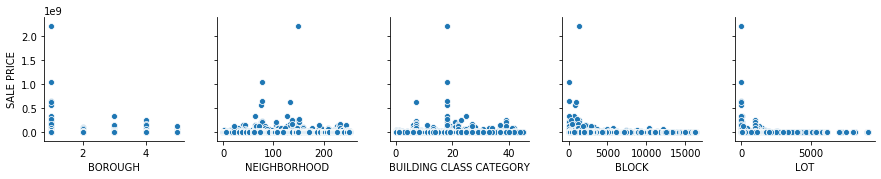

In [53]:
sns.pairplot(df,y_vars=['SALE PRICE'], x_vars=['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BLOCK', 'LOT'],palette='Dark2')

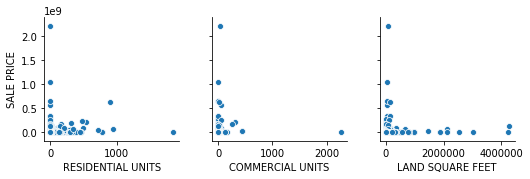

In [54]:
sns.pairplot(df,y_vars=['SALE PRICE'], x_vars=['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'LAND SQUARE FEET'],palette='Dark2')

In [55]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,SALE PRICE
0,1,1,6,392,6,NaN,10009,5,0,5,1633,6625000
1,1,1,6,402,21,NaN,10009,10,0,10,2272,3936272
2,1,1,6,404,55,NaN,10009,6,0,6,2369,8000000
3,1,1,6,406,32,NaN,10009,8,0,8,1750,3192840
4,1,1,7,387,153,NaN,10009,24,0,24,4489,16232000


In [56]:
df.shape

(59759, 12)

In [57]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import RFE

In [62]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,SALE PRICE
0,1,1,6,392,6,NaN,10009,5,0,5,1633,6625000
1,1,1,6,402,21,NaN,10009,10,0,10,2272,3936272
2,1,1,6,404,55,NaN,10009,6,0,6,2369,8000000
3,1,1,6,406,32,NaN,10009,8,0,8,1750,3192840
4,1,1,7,387,153,NaN,10009,24,0,24,4489,16232000


In [63]:
df.describe().append(df.isnull().sum().rename("isnull"))

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,SALE PRICE,APARTMENT NUMBER
count,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,5.975900e+04,5.975900e+04,NaN
mean,2.939875,129.534597,6.965428,4151.617982,390.768621,10705.739269,1.728208,0.163172,1.903663,3.222356e+03,1.494927e+06,NaN
std,1.326832,74.573386,7.269094,3568.943382,670.844273,1264.098174,14.159398,9.821318,17.337769,3.617774e+04,1.232953e+07,NaN
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,NaN
25%,2.000000,71.000000,1.000000,1277.000000,21.000000,10301.000000,0.000000,0.000000,0.000000,2.000000e+03,3.700000e+05,NaN
50%,3.000000,126.000000,8.000000,3167.000000,50.000000,11207.000000,1.000000,0.000000,1.000000,2.214000e+03,6.255000e+05,NaN
75%,4.000000,199.000000,13.000000,6107.000000,1002.000000,11356.000000,2.000000,0.000000,2.000000,2.500000e+03,1.070000e+06,NaN
max,5.000000,253.000000,45.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,2.210000e+09,NaN
isnull,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,46183.0


In [64]:
df.drop("APARTMENT NUMBER", inplace=True,axis=1)

In [65]:
from sklearn.model_selection import train_test_split
X = df.drop('SALE PRICE',axis=1)
y = df['SALE PRICE']

Xtrn, Xtest, Ytrn, Ytest = train_test_split(X,y,test_size=0.3, random_state=42)
models = [LinearRegression(), linear_model.Lasso(alpha=0.1), Ridge(alpha=100.0), RandomForestRegressor(n_estimators=100, max_features='sqrt'), KNeighborsRegressor(n_neighbors=6),DecisionTreeRegressor(max_depth=4), ensemble.GradientBoostingRegressor()]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
score on training 0.05512692680924847
r2 score 0.012173541178645442
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8170486076816087e+18, tolerance: 384286822644278.7
  positive)


score on training 0.05431705409798393
r2 score 0.011869466585596511
Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
score on training 0.05500585339960661
r2 score 0.012097776272147365
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
score on training 0.917224373488559
r2 score 0.09676282656663837
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')
score on trainin

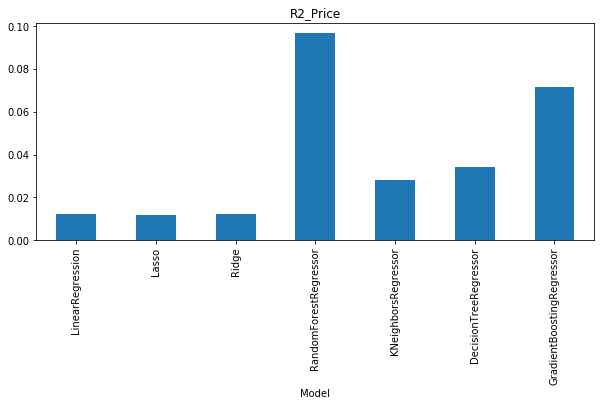

In [66]:
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
    print(model)
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    model.fit(Xtrn, Ytrn)
    tmp['R2_Price'] = r2_score(Ytest, model.predict(Xtest))
    print('score on training',model.score(Xtrn, Ytrn))
    print('r2 score',r2_score(Ytest, model.predict(Xtest)))
    TestModels = TestModels.append([tmp])
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.R2_Price.plot(ax=axes, kind='bar', title='R2_Price')
plt.show()